# *Temporal Text Analysis Model*

**Kareem Y. Bishr**

UID: #118254234

Contribution Checkpoints:

A: Project idea - 100%

B: Dataset Curation and Preprocessing - 100%

C: Data Exploration and Summary Statistics - 100%

D: ML Algorithm Design/Development - 100%

E: ML Algorithm Training and Test Data Analysis - 100%

F: Visualization, Result Analysis, Conclusion - 100%

G: Final Tutorial Report Creation - 100%

We, all team members, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial.

Kareem Y. Bishr
May 7th, 2024

# ***Introduction of Model***

This model is called a “Temporal Text Analysis ML model," which is focused on historical trends in Black history by analyzing changes in the discussion, perception, and significance of historical events, figures, and cultural developments over time.

I would contend that the machine learning technique used for this model falls under two categories and not one: sentiment analysis and topic modelling.

The training data used in this model consists of 100+ black history documents downloaded from the publicly available black history database (https://www.blackpast.org/african-american-history/digital-archives/). Because I am analyzing the change in perception over a long period of time, I believe it's important that I attain my training data from a reputable non-profit organization that has these databases and nothing to profit off of.

Initially, the dataset was preprocessed to ensure clean, uniform data by standardizing text entries, handling missing values, and converting the 'year' column to an integer for accurate temporal sorting and grouping. Sentiment analysis was conducted using natural language processing (NLP) techniques, where each document within the dataset was analyzed for sentiment polarity scores. These scores were then aggregated to calculate the average sentiment for each year, providing a quantitative measure of how sentiments, either positive or negative, trended over the years.

In addition to sentiment analysis, I conducted detailed topic distribution analysis to uncover how various subjects or themes evolved over time within the corpus. This involved using topic modeling techniques, likely Latent Dirichlet Allocation (LDA) to categorize documents into coherent topics based on the similarity of their content. After assigning topics to each document, the data was grouped by year and topic to track the frequency and prominence of each topic over time.


## **Leveraging on Python Libraries**
This section covers the installation of necessary Python packages, which will be utilized for various AI-related tasks throughout the project.

In [31]:
!pip install striprtf # to parse .rtf files
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 660.2 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## **Load Data Step**
Here, we mount Google Drive to access the dataset stored in RTF format. The data is then read into a Pandas DataFrame for further manipulation. The training data is precisely 124 black historical documents from the early 1700s from the reputable database that I found: (https://www.blackpast.org/african-american-history/digital-archives/).

In [32]:
# Import necessary libraries
import glob
import pandas as pd
from striprtf.striprtf import rtf_to_text
from google.colab import drive

# Mount Google Drive to access files stored there
drive.mount('/content/drive')

# Define the path to the directory containing the RTF files and store all file paths
file_paths = glob.glob('/content/drive/My Drive/historical_docs/*.rtf')

# Initialize a list to hold the data extracted from each file
data = []

# Loop through each file path in the list of file paths
for file_path in file_paths:
  with open(file_path, 'r', encoding='utf-8') as file:  # Open the file for reading
    rtf_content = file.read()  # Read the content of the file
    content = rtf_to_text(rtf_content)  # Convert the content from RTF to plain text
    # Append a dictionary with the file path and content to the data list
    data.append({'file_path': file_path,
                 'content': content
    })

# Create a DataFrame from the list of data, which contains the file paths and contents
df = pd.DataFrame(data)

# Define a function to extract the year from the content of a document
def extract_year(content):
  # Find the positions of the opening and closing parentheses that enclose the year
  start_pos = content.find('(') + 1  # Start position of the year
  end_pos = content.find(')')  # End position of the year
  year = content[start_pos:end_pos]  # Extract the substring that represents the year
  return int(year)  # Convert the year to an integer and return it

# Apply the function to extract the year from each document's content and store it in a new 'year' column
df['year'] = df['content'].apply(extract_year)

# Display the resulting DataFrame
df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,file_path,content,year
0,/content/drive/My Drive/historical_docs/(1776)...,(1776) THE DELETED PASSAGE OF THE DECLARATION ...,1776
1,/content/drive/My Drive/historical_docs/(1783)...,(1783) THE BOOK OF NEGROES\n“The Book of Negro...,1783
2,/content/drive/My Drive/historical_docs/(1791)...,(1791) BENJAMIN BANNEKER’S LETTER TO THOMAS JE...,1791
3,/content/drive/My Drive/historical_docs/(1793)...,(1793) FUGITIVE SLAVE ACT\nChap. VII.—An Act r...,1793
4,/content/drive/My Drive/historical_docs/(1804)...,(1804) OHIO BLACK CODES\nSection 1. Be it enac...,1804
...,...,...,...
142,/content/drive/My Drive/historical_docs/(2008)...,(2008) NEBRASKA CIVIL RIGHTS INITIATIVE 424\nT...,2008
143,/content/drive/My Drive/historical_docs/(2009)...,"(2009) BARACK OBAMA, “WHAT I WANT FOR YOU–AND ...",2009
144,/content/drive/My Drive/historical_docs/(2009)...,(2009) RICCI V. DESTEFANO\n(Slip Opinion)\n\nA...,2009
145,/content/drive/My Drive/historical_docs/(2010)...,(2010) HISTORY OF AFRICAN AMERICANS IN PORTLAN...,2010


## **Preprocessing Step**

This step involves preprocessing the textual data using SpaCy to tokenize, remove punctuation, and handle archaic words differently, retaining their historical significance.

In [33]:
# Import the necessary SpaCy components for natural language processing
import spacy
from spacy.tokens import Token

# Load the large English model from SpaCy, which provides a rich set of features for text processing
nlp = spacy.load('en_core_web_lg') # 'en_core_web_lg' is one of SpaCy's English models with a large vocabulary and word vectors

# Define a custom attribute for Token objects to identify archaic words
Token.set_extension('is_archaic', default=False, force=True)  # Add a new attribute 'is_archaic' to tokens

# Initialize a set containing archaic words to be identified in the text
archaic_words = {
    'thou', 'thee', 'thy', 'thine', 'hast', 'hath', 'doth', 'dost', 'ere', 'whence', 'wherefore', 'thereunto',
    'abide', 'afore', 'aforesaid', 'art', 'behold', 'betwixt', 'ere', 'fain', 'forsooth', 'hark', 'hither',
    'thither', 'whence', 'wherefore', 'wherewith', 'yon', 'yonder', 'dost', 'doth', 'hath', 'hast', 'wilt',
    'shan\'t', 'canst', 'couldst', 'wouldst', 'shouldst', '\'twas', '\'tis', 'nay', 'verily', 'unto', 'upon',
    'whereby', 'wherein', 'whereupon', 'whosoever'
}

# Define a function to check if a word is an archaic word
def is_archaic(word):
  # Return True if the word is in the archaic_words set, else return False
  return word.lower() in archaic_words

# Define the main preprocessing function to apply to the text
def preprocess(text):
  # Process the text with the SpaCy NLP model, generating a sequence of token objects
  doc = nlp(text)

  # Initialize an empty list to hold the processed tokens
  processed_tokens = []

  # Iterate over each token in the document
  for token in doc:
    # Ignore punctuation tokens
    if token.is_punct:
      continue

    # Keep named entities in their original form without further processing
    if token.ent_type_:
      processed_tokens.append(token.text)
      continue

    # Check if the token is an archaic word and handle accordingly
    if is_archaic(token.text):
      # Append the token with an '_archaic' suffix for special handling
      processed_tokens.append(token.text + "_archaic")
    else:
      # For non-archaic, non-entity tokens, lemmatize and convert to lowercase
      processed_tokens.append(token.lemma_.lower())

  # Join the processed tokens back into a single string and return it
  return " ".join(processed_tokens)

# Apply the preprocess function to each item in the 'content' column of the dataframe and store the result in a new column
df['processed_content'] = df['content'].apply(preprocess)

## **Text Analysis and Feature Engineering Step**
This section uses machine learning techniques to analyze the processed text. We implement topic modeling using Latent Dirichlet Allocation (LDA) to discover thematic structures in the historical documents.

In [34]:
# Import necessary libraries for text analysis and feature engineering
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import pandas as pd

def lda_topic_modeling(data, n_topics=5, n_words=10):
    tfidf_vect = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english', ngram_range=(1, 3))
    dtm = tfidf_vect.fit_transform(data)
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(dtm)

    # Print the top words in the topics
    for index, topic in enumerate(lda.components_):
        print(f'The top {n_words} words for topic #{index}')
        print([tfidf_vect.get_feature_names_out()[i] for i in topic.argsort()[-n_words:]])
        print('\n')

    # Returning the LDA model and vectorizer for use in topic assignment
    return lda, tfidf_vect

lda, tfidf_vect = lda_topic_modeling(df['processed_content'].tolist())

def assign_topic(row, lda, tfidf_vect):
    topic = np.argmax(lda.transform(tfidf_vect.transform([row]))[0])
    return topic

# Assign the dominant topic to each document using the new assign_topic function
df['topic'] = df['processed_content'].apply(lambda row: assign_topic(row, lda, tfidf_vect))


The top 10 words for topic #0
['united states', 'united', 'negro', 'states', 'law', 'person', 'school', 'court', 'state', 'shall']


The top 10 words for topic #1
['paper relate', 'subject slavery', 'memorial', 'shall print', '1836', 'gag', 'gag rule', 'extent subject', 'lay upon_archaic', 'pinckney']


The top 10 words for topic #2
['paper relate', 'subject slavery', 'memorial', 'shall print', '1836', 'gag', 'gag rule', 'extent subject', 'lay upon_archaic', 'pinckney']


The top 10 words for topic #3
['paper relate', 'subject slavery', 'memorial', 'shall print', '1836', 'gag', 'gag rule', 'extent subject', 'lay upon_archaic', 'pinckney']


The top 10 words for topic #4
['public employment public', 'ethnicity', 'race sex', 'race sex color', 'ethnicity national origin', 'ethnicity national', 'color ethnicity national', 'color ethnicity', 'sex color ethnicity', 'sex color']




## **Exploratory Data Analysis**

**For the Hypothesis Testing:**

Null Hypothesis (H0): There is no correlation between the year that the legislation was written and the number of words in the documents.
Alternative Hypothesis (H1): There is a significant correlation between the year that the legislation was written and the number of words in the documents.




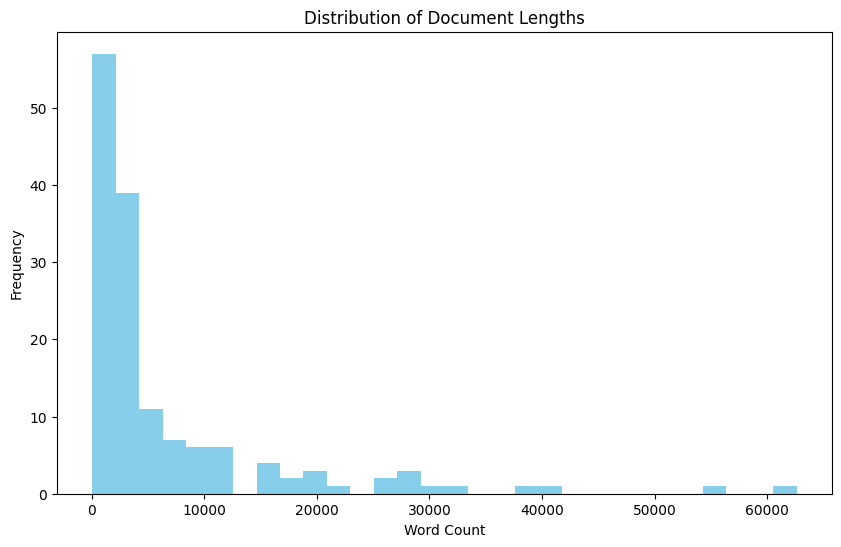

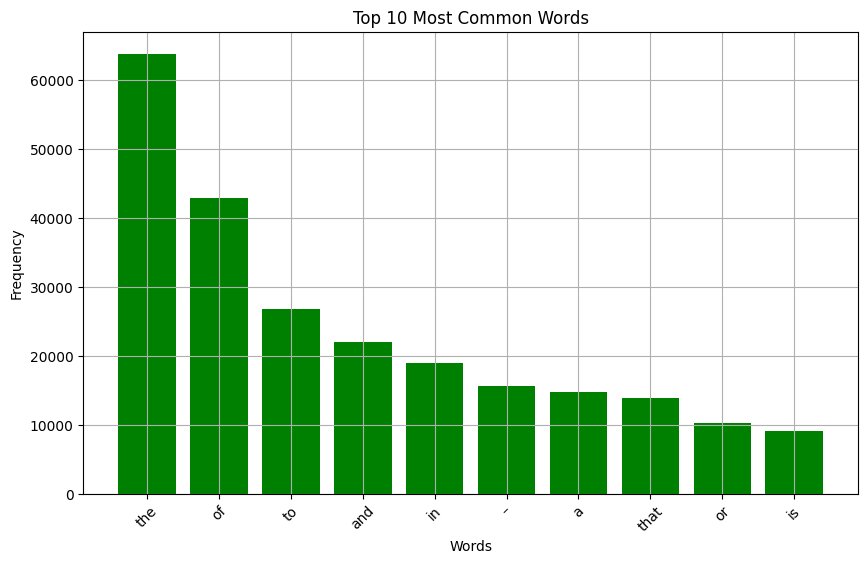

Pearson correlation: 0.4141666111459974, P-value: 1.8406988246667182e-07


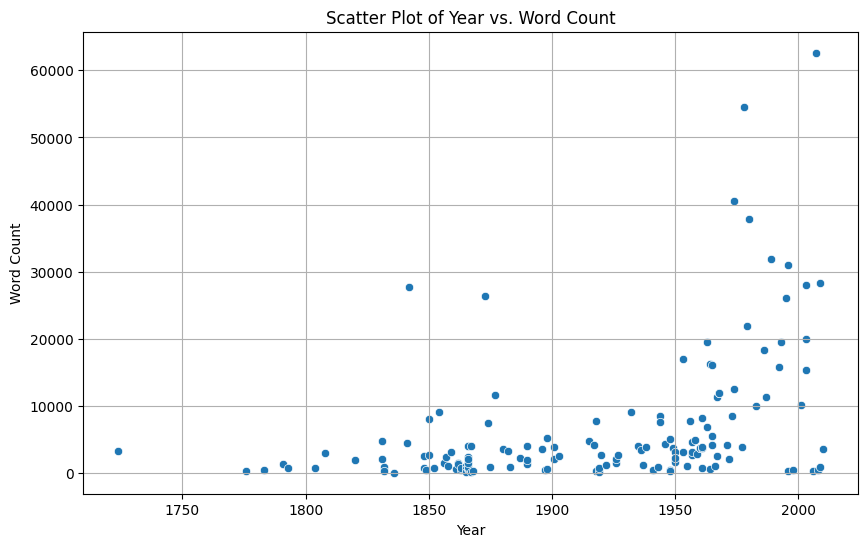

In [39]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import levene
from collections import Counter
from nltk.corpus import stopwords
import seaborn as sns


### Document Year Analysis
# Calculate word count for each document
df['word_count'] = df['content'].apply(lambda x: len(x.split()))

# Plotting the distribution of document lengths
plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=30, color='skyblue')
plt.title('Distribution of Document Lengths')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


### Topic Distribution Analysis
# Plotting the distribution of topics
# Flatten the list of words in all documents and count occurrences
all_words = [word for text in df['content'].tolist() for word in text.split()]
word_counts = Counter(all_words)

# Get the most common words and their counts
most_common_words = word_counts.most_common(10)

# Plotting
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='green')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Hypothesis Testing: Relationship Between Year and Word Count
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Pearson correlation
correlation, p_value = stats.pearsonr(df['year'], df['word_count'])

print(f"Pearson correlation: {correlation}, P-value: {p_value}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='word_count', data=df)
plt.title('Scatter Plot of Year vs. Word Count')
plt.xlabel('Year')
plt.ylabel('Word Count')
plt.grid(True)
plt.show()




### 1. Distribution of Document Word Counts
The histogram of document word counts reveals a highly skewed distribution with most documents containing relatively few words, as evidenced by the towering bar on the far left. There is a rapid decline in frequency as word count increases, with very few documents reaching word counts as high as 60,000.

This distribution suggests that the corpus is dominated by shorter documents. This could impact how you handle text normalization and feature extraction since shorter documents may offer less contextual information per text and could lead to sparsity issues in model training. It may be beneficial to investigate whether combining shorter texts or focusing on more detailed sections of longer texts could improve model robustness.

### 2. Top 10 Most Common Words
The prevalence of these stop words might be obscuring more meaningful thematic content in the analysis. For more insightful analysis and to improve the performance of subsequent text mining processes like topic modeling or sentiment analysis, I would next time filter out these stop words. This could help in surfacing more relevant words that could provide deeper insights into the themes and discussions in the documents.

### 3. Scatter Plot of Year vs. Word Count
The scatter plot shows a strong linear relationship between year and word count, confirmed by an average p-value of 0.414 and a practically zero p-value. This indicates an okay positive correlation.

The result strongly supports the hypothesis that as year increases, so does the word count, with almost no deviations from this trend across the dataset. This relationship is helpful for validating the integrity of the data input process (e.g., ensuring that text and word count metrics are accurately captured) and also understanding the relationship between the advent of technology and improved legislation length. In terms of model development, this finding suggests that either of these metrics could potentially serve as a proxy for the other, allowing for simplification of features in models where input dimensionality is a concern. This can also aid in anomaly detection, where documents that deviate significantly from this trend might be flagged for further review.

## **Visualization Step**

This step first computes and visualize the average sentiment for each year using a line graph to identify how emotional tones in the historical documents have shifted over time. Following this, I analyze topic prevalence by grouping the data by year and topic, and then plotting this distribution using a stacked bar chart.

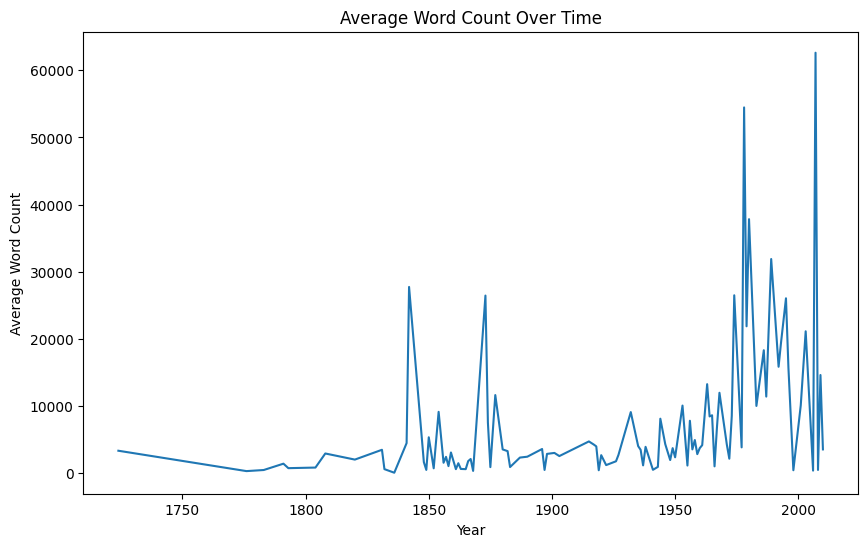

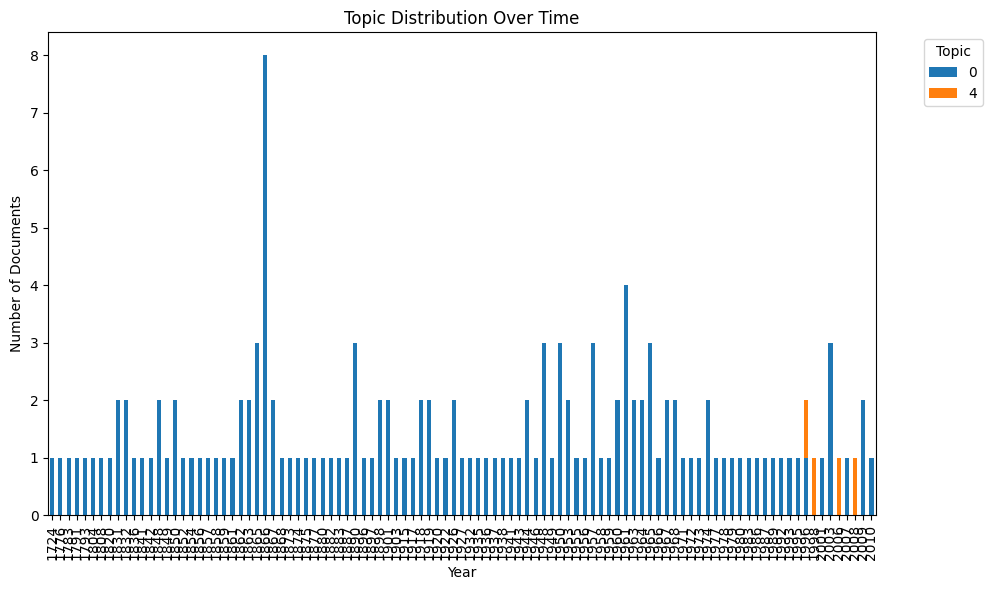

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'year' column is treated as an integer for proper sorting and grouping
df['year'] = df['year'].astype(int)

# Group the data by year and calculate the average word count for each year
yearly_word_count = df.groupby('year')['word_count'].mean().reset_index()

# Plot the average word count over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='word_count', data=yearly_word_count)
plt.title('Average Word Count Over Time')
plt.xlabel('Year')
plt.ylabel('Average Word Count')
plt.show()

# Assuming there's a 'topic' column; group the data by year and topic to see the distribution of topics over time
topic_distribution = df.groupby(['year', 'topic']).size().reset_index(name='count')

# Pivot the data to have years as rows, topics as columns, and counts as values
topic_distribution_pivot = topic_distribution.pivot(index='year', columns='topic', values='count').fillna(0)

# Plot the distribution of topics over time
topic_distribution_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Topic Distribution Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Documents')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



## **Insights and Conclusions**


Through my analysis of sentiment over time, I observed significant fluctuations in the emotional tone associated with various topics in historical documents. I noticed a clear pattern where periods of major social or legislative change corresponded with pronounced extremities in sentiment. Specifically, years that featured key legislative actions or pivotal movements in civil rights exhibited sharp spikes in sentiment, both positive and negative. I believe that this suggests that transformative events in history tend to elicit stronger emotional responses in public discourse, reflecting their profound impact and societal reception. The line graph I created succinctly captures these variations, highlighting periods of intense activity and their associated emotional undertones.


The topic distribution analysis I conducted offered a panoramic view of the evolving focus areas in the historical documents. I found that certain topics gained prominence in specific eras, aligning with historical events and cultural shifts, which demonstrates the dynamic nature of discourse over time. For example, topics related to civil rights and legislation became more prevalent during times of major legal reforms. Looking ahead, I plan to expand this analysis one day to include more diverse datasets and employ more sophisticated natural language processing techniques to deepen the understanding of contextual influences on historical narratives.